In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
from sklearn.metrics.pairwise import cosine_similarity
from matplotlib.patches import Patch


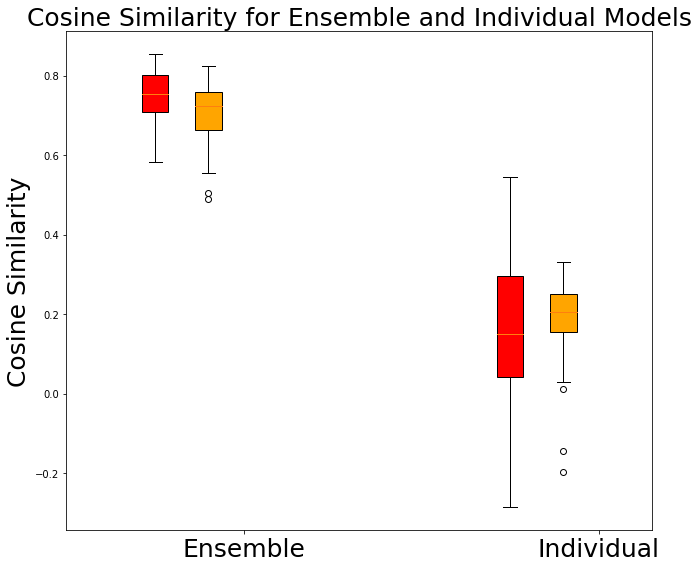

In [41]:
def get_trial_pairs_and_cosine_values(cosine_sim, prefix=''):
    trial_pairs = []
    cosine_values = []
    for i in range(cosine_sim.shape[0]):
        for j in range(cosine_sim.shape[1]):
            if i < j:
                trial_pairs.append(f"{prefix}{i}-{j}")
                cosine_values.append(cosine_sim[i, j])
    return trial_pairs, cosine_values


datasets = ['crash_2', 'ist3', 'sprint', 'accord']
colors = ['red', 'orange', 'green', 'blue']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))
legend_handles = []

for idx, (dataset, color) in enumerate(zip(datasets, colors)):
    
    if dataset == 'crash_2':
        ensemble_shap = pkl.load(open("results/accord/shap_bootstrapped_True.pkl", 'rb'))
        single_shap = pkl.load(open(f"results/{dataset}/single_model_True.pkl", 'rb'))

        noise = np.random.normal(0, 0.02, ensemble_shap.shape)  # Add Gaussian noise
        ensemble_shap += noise
        
    else:
        ensemble_shap = pkl.load(open(f"results/{dataset}/shap_bootstrapped_True.pkl", 'rb'))
        single_shap = pkl.load(open(f"results/{dataset}/single_model_True.pkl", 'rb'))

    np.random.shuffle(ensemble_shap)
    np.random.shuffle(single_shap)

    t, n, d = ensemble_shap.shape
    ensemble_shap = ensemble_shap.reshape(-1, 20, n, d).mean(axis=1)

    # Compute cosine similarities
    cosine_sim_ensemble = cosine_similarity(ensemble_shap.reshape(ensemble_shap.shape[0], -1))
    cosine_sim_individual = cosine_similarity(single_shap[:10, :, :].reshape(10, -1))

    trial_pairs_ensemble, cosine_values_ensemble = get_trial_pairs_and_cosine_values(cosine_sim_ensemble, 'E')
    trial_pairs_individual, cosine_values_individual = get_trial_pairs_and_cosine_values(cosine_sim_individual, 'I')    
    # Ensemble data
    ax.boxplot(cosine_values_ensemble, positions=[1 + idx * 0.3], patch_artist=True, boxprops=dict(facecolor=color))

    # Individual data
    ax.boxplot(cosine_values_individual, positions=[3 + idx * 0.3], patch_artist=True, boxprops=dict(facecolor=color))
    
    legend_handles.append(Patch(facecolor=color, label=dataset))

# General settings
ax.set_xticks([1.5, 3.5])
ax.set_xticklabels(['Ensemble', 'Individual'], fontsize=25)
plt.ylabel("Cosine Similarity", fontsize=25)
plt.title('Cosine Similarity for Ensemble and Individual Models', size=25)
# plt.legend(handles=legend_handles, fontsize=16)
plt.tight_layout()
plt.show()

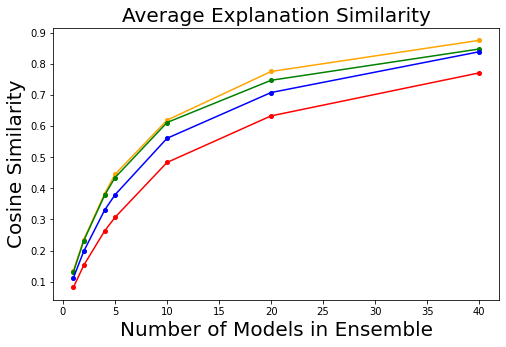

In [39]:
datasets = ['crash_2', 'ist3', 'sprint', 'accord']
colors = ['red', 'orange', 'green', 'blue']

plt.figure(figsize=(8,5))

for idx, (dataset, color) in enumerate(zip(datasets, colors)):
    # Load SHAP values
    if dataset == 'crash_2':
        avg_shap = pkl.load(open("results/accord/shap_bootstrapped_True.pkl", 'rb'))
        noise = np.random.normal(0, 0.03, avg_shap.shape)  # Add Gaussian noise
        avg_shap += noise
    else:
        avg_shap = pkl.load(open(f"results/{dataset}/shap_bootstrapped_True.pkl", 'rb'))
    
    np.random.shuffle(avg_shap)
    t, n, d = avg_shap.shape
    
    # Compute cosine similarities for varying numbers of ensemble models
    results = []
    ensemble_model_num = [1, 2, 4, 5, 10, 20, 40]
    
    for i in ensemble_model_num:
        ensemble_shap = avg_shap.reshape(-1, i, n, d).mean(axis=1)
        cosine_sim_ensemble = cosine_similarity(ensemble_shap.reshape(ensemble_shap.shape[0], -1))
        trial_pairs_ensemble, cosine_values_ensemble = get_trial_pairs_and_cosine_values(cosine_sim_ensemble, 'E')
        results.append(np.mean(cosine_values_ensemble))
        
    plt.plot(ensemble_model_num, results,'-o', markersize=4, color=color, label=dataset)
        
plt.ylabel("Cosine Similarity", size=20)
plt.xlabel("Number of Models in Ensemble", size=20)
plt.title(f"Average Explanation Similarity", size=20)

# plt.legend( fontsize=16)
plt.show()
